<a href="https://colab.research.google.com/github/Venture-Coding/SUNY-Buffalo-ML-and-self-learning/blob/main/Regression/Decision_tree_bank_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [31]:

# read data
bank = pd.read_csv("bank_train.csv")
X = bank.drop(['purchased'], axis=1)
y = bank[['purchased']]

print(y.head())
X.head()

   purchased
0          1
1          0
2          0
3          0
4          0


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,id,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,41,679,2,999,0,1.1,93.994,-36.4,4.857,5191.0,1088,7,1,3,1,2,0,1,6,1,1
1,32,296,2,999,0,-0.1,93.200,-42.0,4.153,5195.8,4045,1,1,2,0,0,0,1,7,3,1
2,44,230,1,999,0,-1.8,93.075,-47.1,1.479,5099.1,492,4,0,5,0,2,0,0,0,0,1
3,38,119,1,999,0,-1.8,92.843,-50.0,1.757,5099.1,3563,9,1,4,0,0,0,0,5,2,1
4,60,259,1,999,0,1.4,93.444,-36.1,4.962,5228.1,1828,0,1,2,0,2,0,0,1,2,1


In [32]:

# read train, test data
bank_train, bank_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size = 0.2)
  
print(bank_train.head())
print(bank_test.head())


      age  duration  campaign  pdays  ...  contact  month  day_of_week  poutcome
1303   33      1176         1    999  ...        0      0            4         1
886    58        70         1    999  ...        0      7            1         1
149    29        14         5    999  ...        0      1            0         1
1311   34        77         4    999  ...        0      6            4         1
2085   45        10        16    999  ...        1      4            2         1

[5 rows x 21 columns]
      age  duration  campaign  pdays  ...  contact  month  day_of_week  poutcome
983    58        79         2    999  ...        0      4            3         1
33     45       226         1    999  ...        0      1            1         1
2047   45       527         1    999  ...        0      7            1         1
2427   59       422         3    999  ...        1      6            2         1
578    34       145         1    999  ...        0      1            1         1

[5 r

In [33]:

# build the model 

# # train the model
print(bank_train.columns)
#y_train = bank_train[['purchased']]
x_train = bank_train

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'id',
       'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [34]:

# Hyperparameter tuning: maxdepth
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}


In [35]:

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(x_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [36]:

# scores of GridSearch CV
scores = tree.cv_results_
print(pd.DataFrame(scores).head())


   mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.004262      0.000230  ...          0.894537         0.000225
1       0.005309      0.000155  ...          0.909522         0.003692
2       0.006450      0.000068  ...          0.919480         0.001243
3       0.008139      0.000293  ...          0.927826         0.002404
4       0.009145      0.000366  ...          0.939966         0.001998

[5 rows x 21 columns]


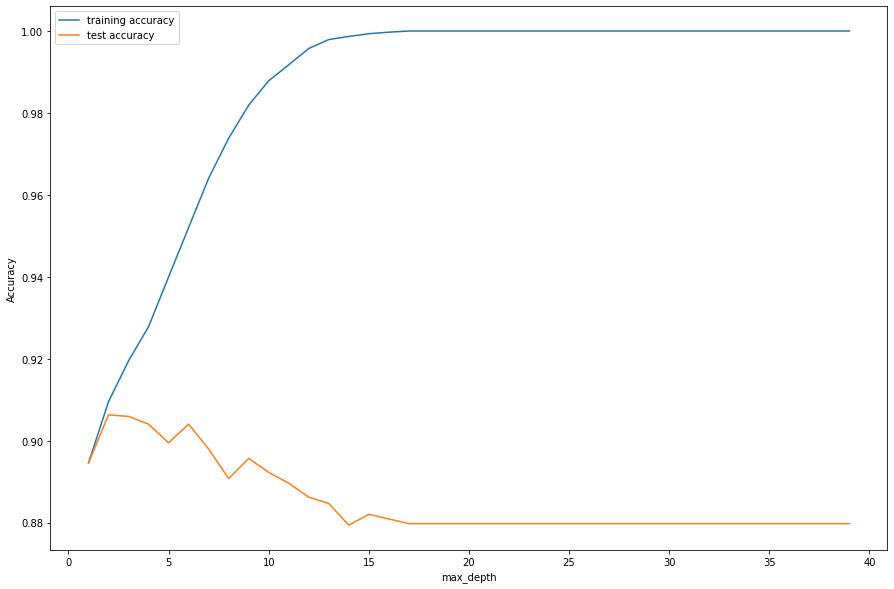

<Figure size 432x288 with 0 Axes>

In [37]:

# plotting accuracies with max_depth
plt.figure(figsize=(15,10))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('hyperparam_c.png') 


In [38]:

# create DT with optimal max_depth
best_tree = DecisionTreeClassifier(max_depth=4)
best_tree.fit(x_train, y_train)

# make predictions
print(bank_test.head())
predictions = best_tree.predict(bank_test)
print(predictions[:5])



      age  duration  campaign  pdays  ...  contact  month  day_of_week  poutcome
983    58        79         2    999  ...        0      4            3         1
33     45       226         1    999  ...        0      1            1         1
2047   45       527         1    999  ...        0      7            1         1
2427   59       422         3    999  ...        1      6            2         1
578    34       145         1    999  ...        0      1            1         1

[5 rows x 21 columns]
[0 0 0 0 0]


In [40]:

# write columns id, predictions into the output file
d = pd.DataFrame({'id': bank_test['id'], 'bank_predicted': predictions})
d.head()

# # write the output
#d.to_csv('/code/output/bank_predictions.csv', sep=",")

,id,bank_predicted
983,3381,0
33,2102,0
2047,2729,0
2427,945,0
578,1886,0


In [54]:
print(bank.loc[bank['id'] == 3381, 'purchased'])
print(bank.loc[bank['id'] == 2102, 'purchased'])
print(bank.loc[bank['id'] == 945, 'purchased'])

983    0
Name: purchased, dtype: int64
33    0
Name: purchased, dtype: int64
2427    0
Name: purchased, dtype: int64


Thus, we have done a pretty decent job of predicting those that have purchased or haven't from amongst the entire dataset, using simple Decision Tree with k_fold validation and Grid Search CV used in tandem.
